<a href="https://colab.research.google.com/github/Fadi7anna/Intro-to-AI/blob/main/K_means_%26_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import pandas as pd
import numpy as np

In [227]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [228]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab datasets/CC GENERAL.csv")
df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [229]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [230]:
df.drop("CUST_ID", axis=1, inplace= True)

In [231]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [232]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

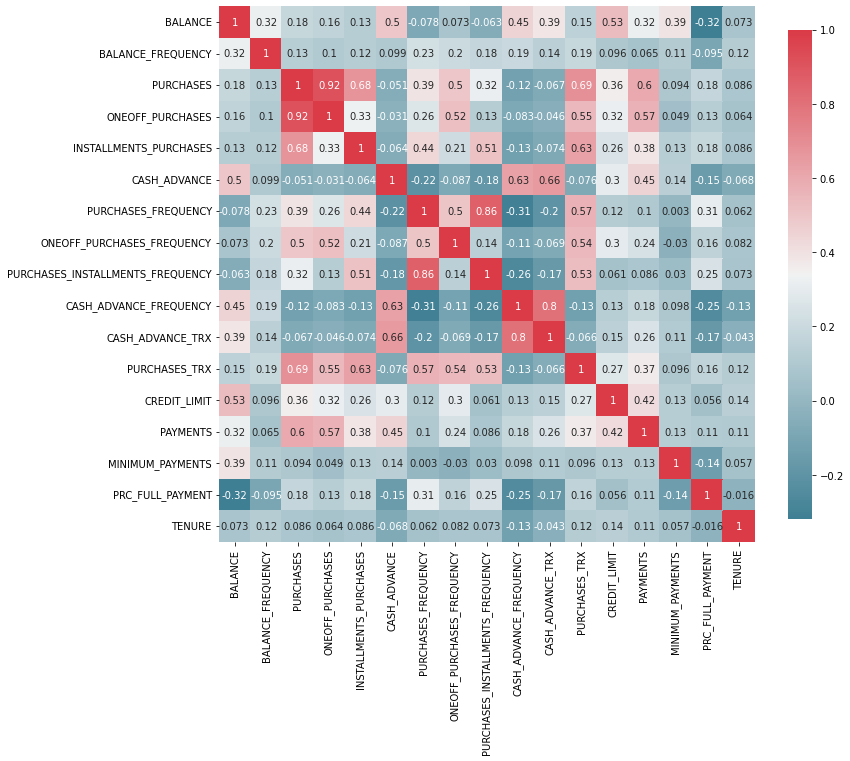

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map(df):
    corr = df.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(df.corr(), cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 10 })


In [234]:
# Agglomerative Example

from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 3 clusters, using euclidean distance as a metric

In [235]:
#After we finish creating our clusters, we can print each point’s corresponding cluster.

agglomerative=pd.DataFrame(clust_labels)


agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


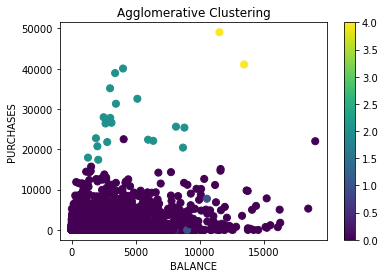

In [236]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df['BALANCE'] , df["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)



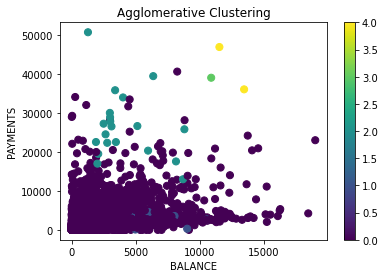

In [237]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['BALANCE'] , df ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

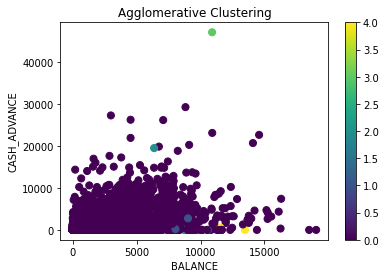

In [238]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['BALANCE'] , df ["CASH_ADVANCE"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("CASH_ADVANCE")
plt.colorbar(scatter)

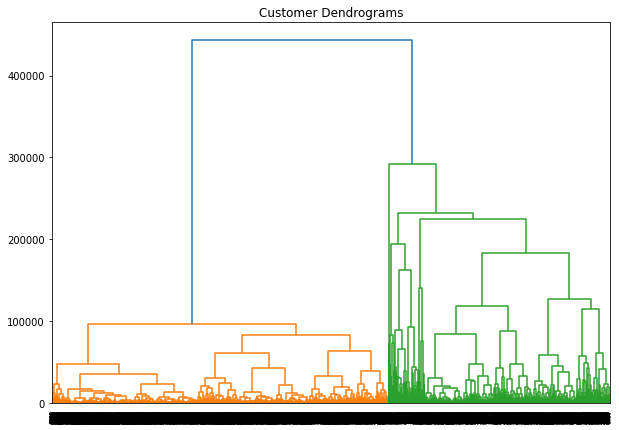

In [242]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="ward"))

In [243]:
# Calculating the squared distance of each point from its closest cluster.

from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans

Sum_of_squared_distances= []
K= range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km= km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [244]:
print(Sum_of_squared_distances)

[79628051265.75497, 51275809064.20933, 33728906755.615837, 24584441994.54353, 19253479464.70423, 15346705064.457592, 12879489668.611536, 11470647644.688599, 10198863763.944109, 9167384164.52611, 8095327397.726496, 7273648385.779909, 6584117190.392899, 5952350085.852341]


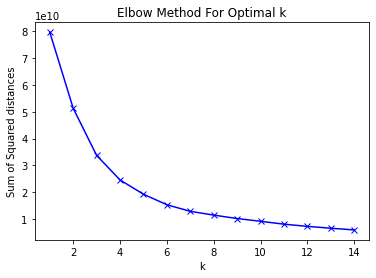

In [245]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared distances')
plt.title('Elbow Method For Optimal k')

plt.show()

In [246]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters

ykmeans= kmeans.fit_predict(X)

In [247]:
ykmeans

array([0, 4, 4, ..., 0, 0, 0], dtype=int32)

In [248]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,4
2,4
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [249]:
kmeans.predict(X)

print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[  524.94880264   607.40919616]
 [ 7298.44697832  1127.27716887]
 [ 2093.31237317  5831.57719124]
 [ 5390.38957129 27690.86583333]
 [ 2953.62745829   582.51370913]]


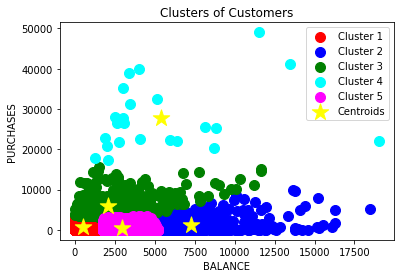

In [250]:
import matplotlib.pyplot as plt
X = np.array(X)

plt.scatter(X [ykmeans== 0, 0], X [ykmeans == 0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X [ykmeans==1, 0], X [ykmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X [ykmeans==2, 0], X [ykmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X [ykmeans==3, 0], X [ykmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X [ykmeans==4, 0], X [ykmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c= 'yellow', marker= '*', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()



In [252]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.5010454813802663

In [253]:
kmeans_per_k= [KMeans(n_clusters=k, random_state=42).fit(X) for k in range (1, 15)]

silhouette_scores= [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

In [254]:
silhouette_scores

[0.6456577525250198,
 0.6282409065765153,
 0.6354344686329888,
 0.5033523001803966,
 0.5177391273643118,
 0.46680400621949075,
 0.46868398201900136,
 0.4641554399922518,
 0.4622259271696299,
 0.46275171492213085,
 0.46496850322669553,
 0.4635677668822323,
 0.4728068505278091]